In [1]:
%env CONDA_PREFIX

'C:\\Ai\\anaconda3\\envs\\tensorflow'

- dataset: https://www.kaggle.com/datasets/piyushagni5/berlin-database-of-emotional-speech-emodb

# Speech Analysis: MelSpectrogram

#### 라이브러리 설치(install librosa)
- conda activate tensorflow
- conda install -c conda-forge librosa

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

In [2]:
pip install pygame

     ---------------------------------------- 8.4/8.4 MB 20.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pygame

pygame 2.1.2 (SDL 2.0.18, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
wav_file = 'd:/Ai/Emodb/wav//03a01Fa.wav'

pygame.init()
pygame.mixer.music.load(wav_file)
pygame.mixer.music.play()
#pygame.event.wait()
#행복하시나요?

In [5]:
# digitizing
y, sr = librosa.load(wav_file, sr=16000) # librosa로 읽기 sampling rate (sr)

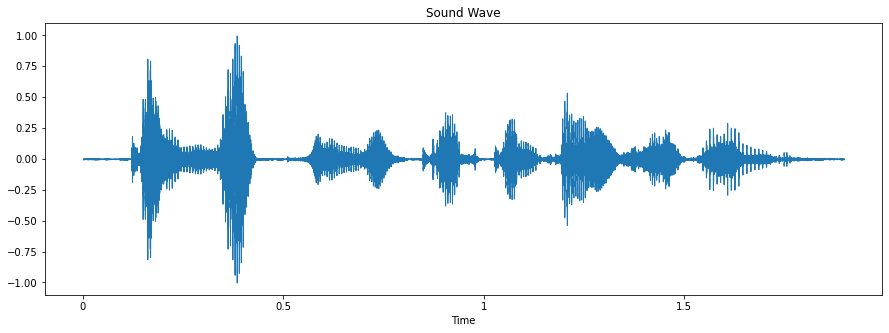

In [6]:
plt.figure(figsize=(15,5))
plt.title('Sound Wave')
librosa.display.waveshow(y=y, sr=sr)
plt.show()

Wav length: 1.89825, Mel_S shape:(40, 190)


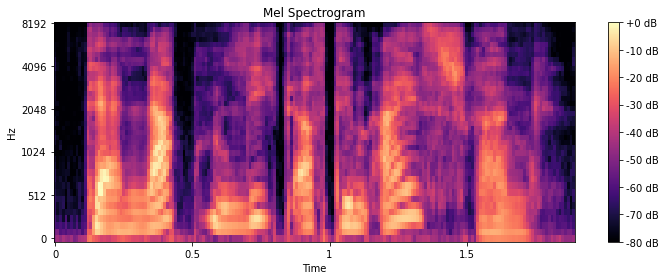

In [8]:
frame_length = 0.025
frame_stride = 0.010

# wav_length = len(y) / sr
input_nfft = int(round(sr * frame_length))
input_stride = int(round(sr * frame_stride))
S = librosa.feature.melspectrogram(y = y, n_mels = 40, 
                                   n_fft = input_nfft,  #몇 포인트씩 이동
                                   hop_length = input_stride)

print("Wav length: {}, Mel_S shape:{}".format(len(y) / sr, np.shape(S)))

plt.figure(figsize=(10, 4))
S_db = librosa.power_to_db(S, ref = np.max)
librosa.display.specshow(S_db, x_axis = 'time', y_axis = 'mel', 
                         sr = sr, hop_length = input_stride )
plt.colorbar(format = '%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.savefig('Mel-Spectrogram example.png')#파일로 저장해라
plt.show()

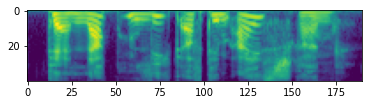

In [9]:
plt.imshow(S_db)